# Постановка задачи

Требуется ознакомиться с выбранным набором данных, визуализировать данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), обработать данные и, в конце, концов, решить задачу классификации.

Данный датасет содержит данные о 5630 клиентах интернет-магазина. Необходимо определить, собирается ли клиент перестать пользоваться интернет-магазином или нет.

Импортируем необходимые библиотеки:

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [183]:
! pip install pandas
! pip install openpyxl
! pip install seaborn
import seaborn as sns

Считаем датасет и выведем его на экран:

In [184]:
data = pd.read_excel('./E Commerce Dataset.xlsx', sheet_name = "E Comm", engine = 'openpyxl')
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [185]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [186]:
data.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [187]:
print(data.shape)

(5630, 20)


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# О нашем наборе данных

* E Comm CustomerID - Уникальный номер клиента
* E Comm Churn - Собирается ли клиент перестать пользоваться сервисом или нет
* E Comm Tenure - Сколько времени данный клиент пользуется сервисом
* E Comm PreferredLoginDevice - Предпочитаемое устройство, с которого клиент пользуется сервисом
* E Comm CityTier - Уровень города, в котором проживает клиент
* E Comm WarehouseToHome - Расстояние между домом клиента и складом
* E Comm PreferredPaymentMode - Предпочитаемый способ оплаты клиента
* E Comm Gender - Пол клиента
* E Comm HourSpendOnApp - Количество часов, проведенное клиентом в мобильном приложении либо на сайте
* E Comm NumberOfDeviceRegistered - Количество устройств, зарегистрированных за клиентом
* E Comm PreferedOrderCat - Предпочитаемая клиентом категория товаров
* E Comm SatisfactionScore - Оценка сервиса клиентом
* E Comm MaritalStatus - Семейный статус клиента
* E Comm NumberOfAddress - Количество адресов, зарегистрированных за клиентом
* E Comm Complain - Были ли у клиента жалобы за последний месяц
* E Comm OrderAmountHikeFromlastYear - На сколько процентов увеличилось количество заказов от этого клиента за последний год
* E Comm CouponUsed - Количество купонов, использованное клиентом за последний месяц
* E Comm OrderCount - Количество заказов от клиента за последний месяц
* E Comm DaySinceLastOrder - Количество дней с последнего заказа клиента
* E Comm CashbackAmount - Средний кэшбек клиента за последний месяц

Выведем статистику по нашему датасету:

In [189]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [190]:
data.describe(include=['object'])

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [191]:
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


Матрица графиков рассеивания:

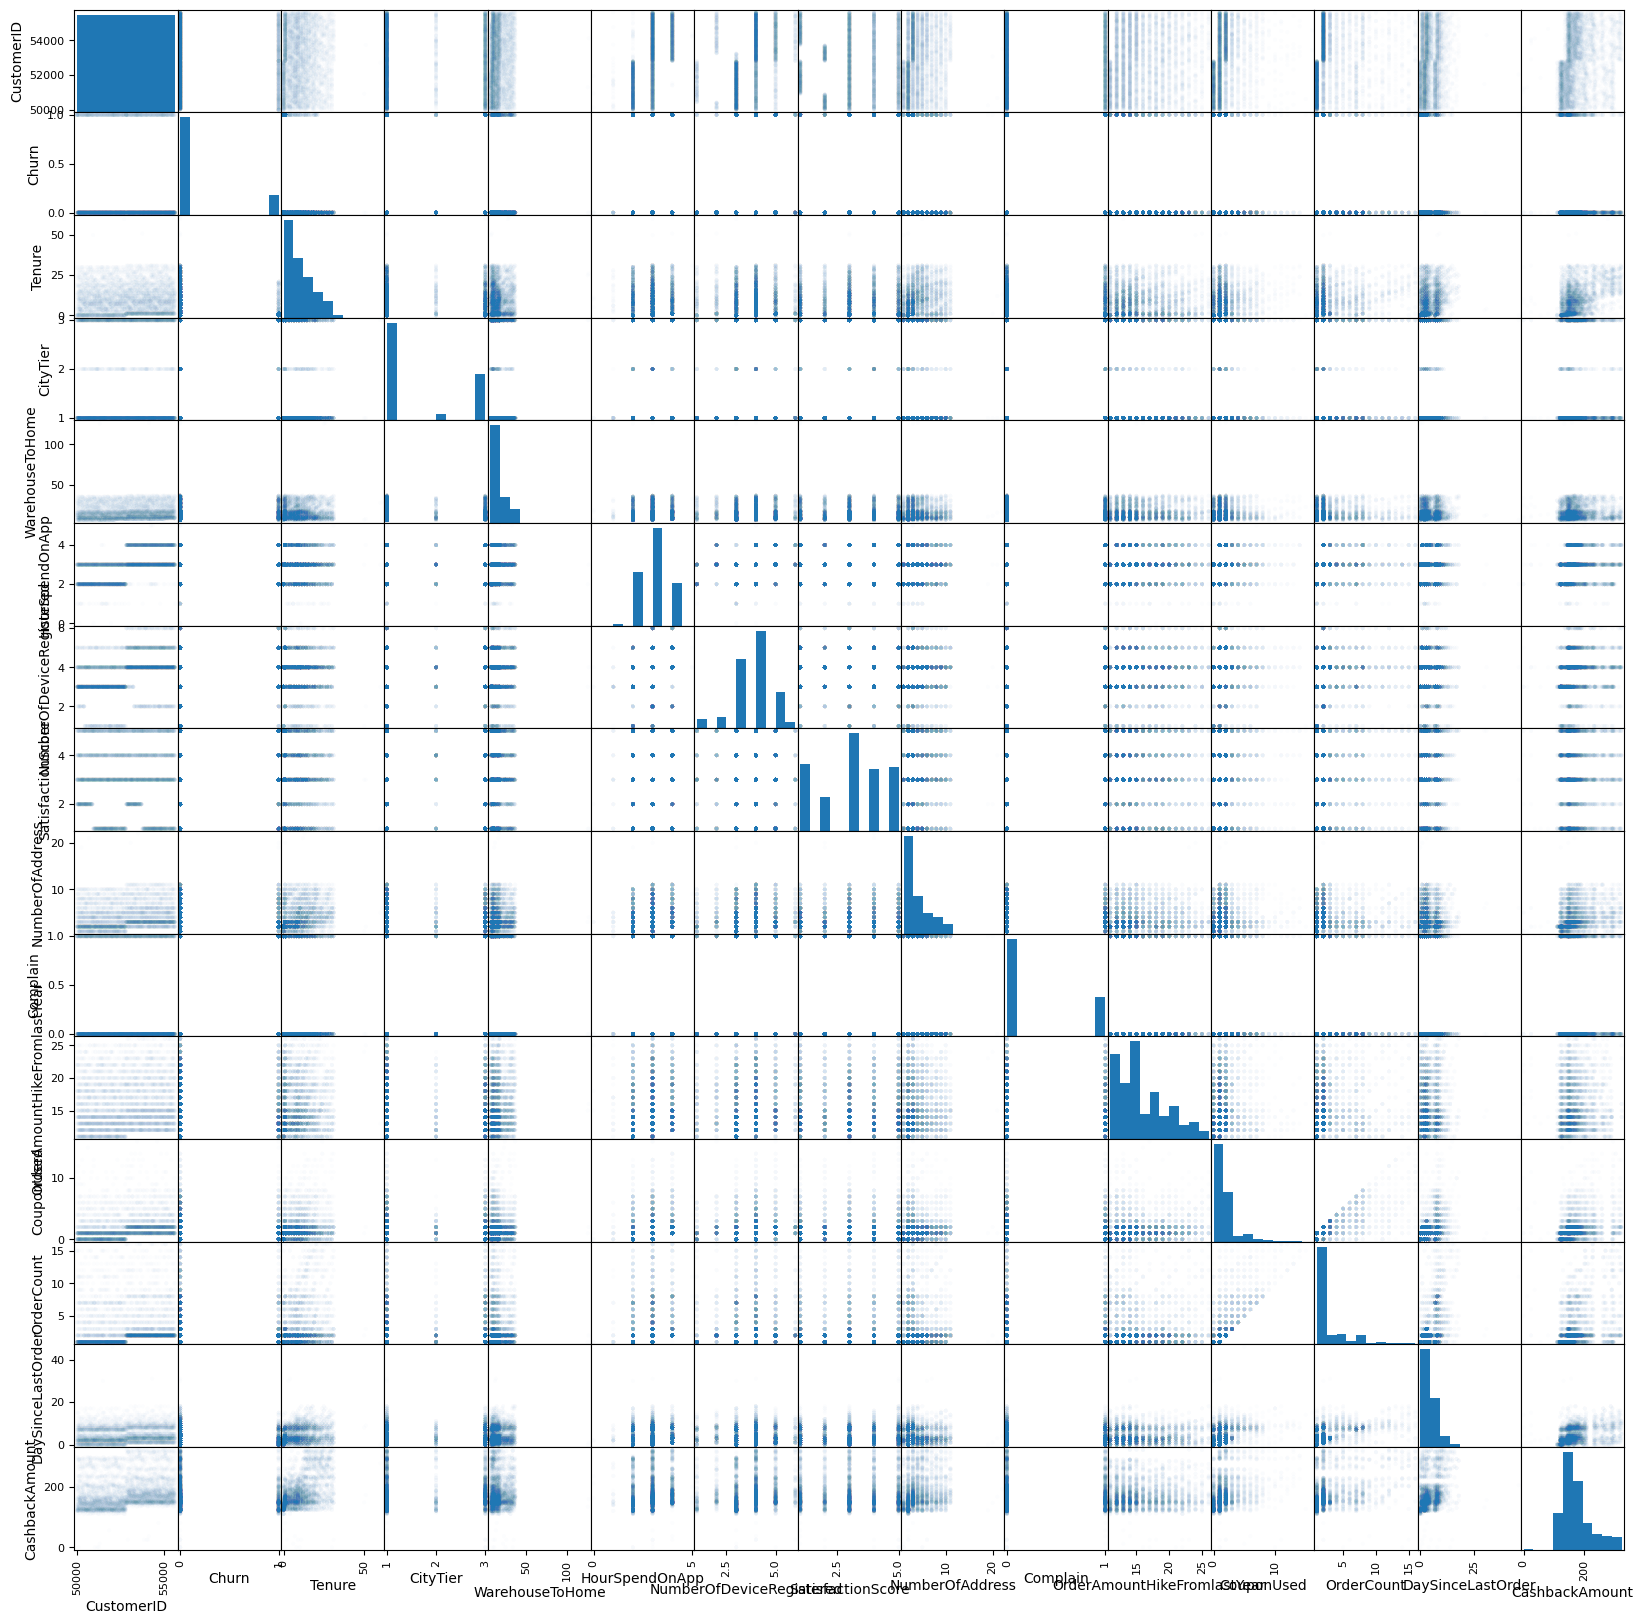

In [192]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (20, 20))
pass

Корреляционная матрица:

In [193]:
data.corr()

<ipython-input-193-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525


Она же, но в визуализированном виде:

<ipython-input-194-36715128daa2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop('CustomerID',axis=1).corr(), annot=True)


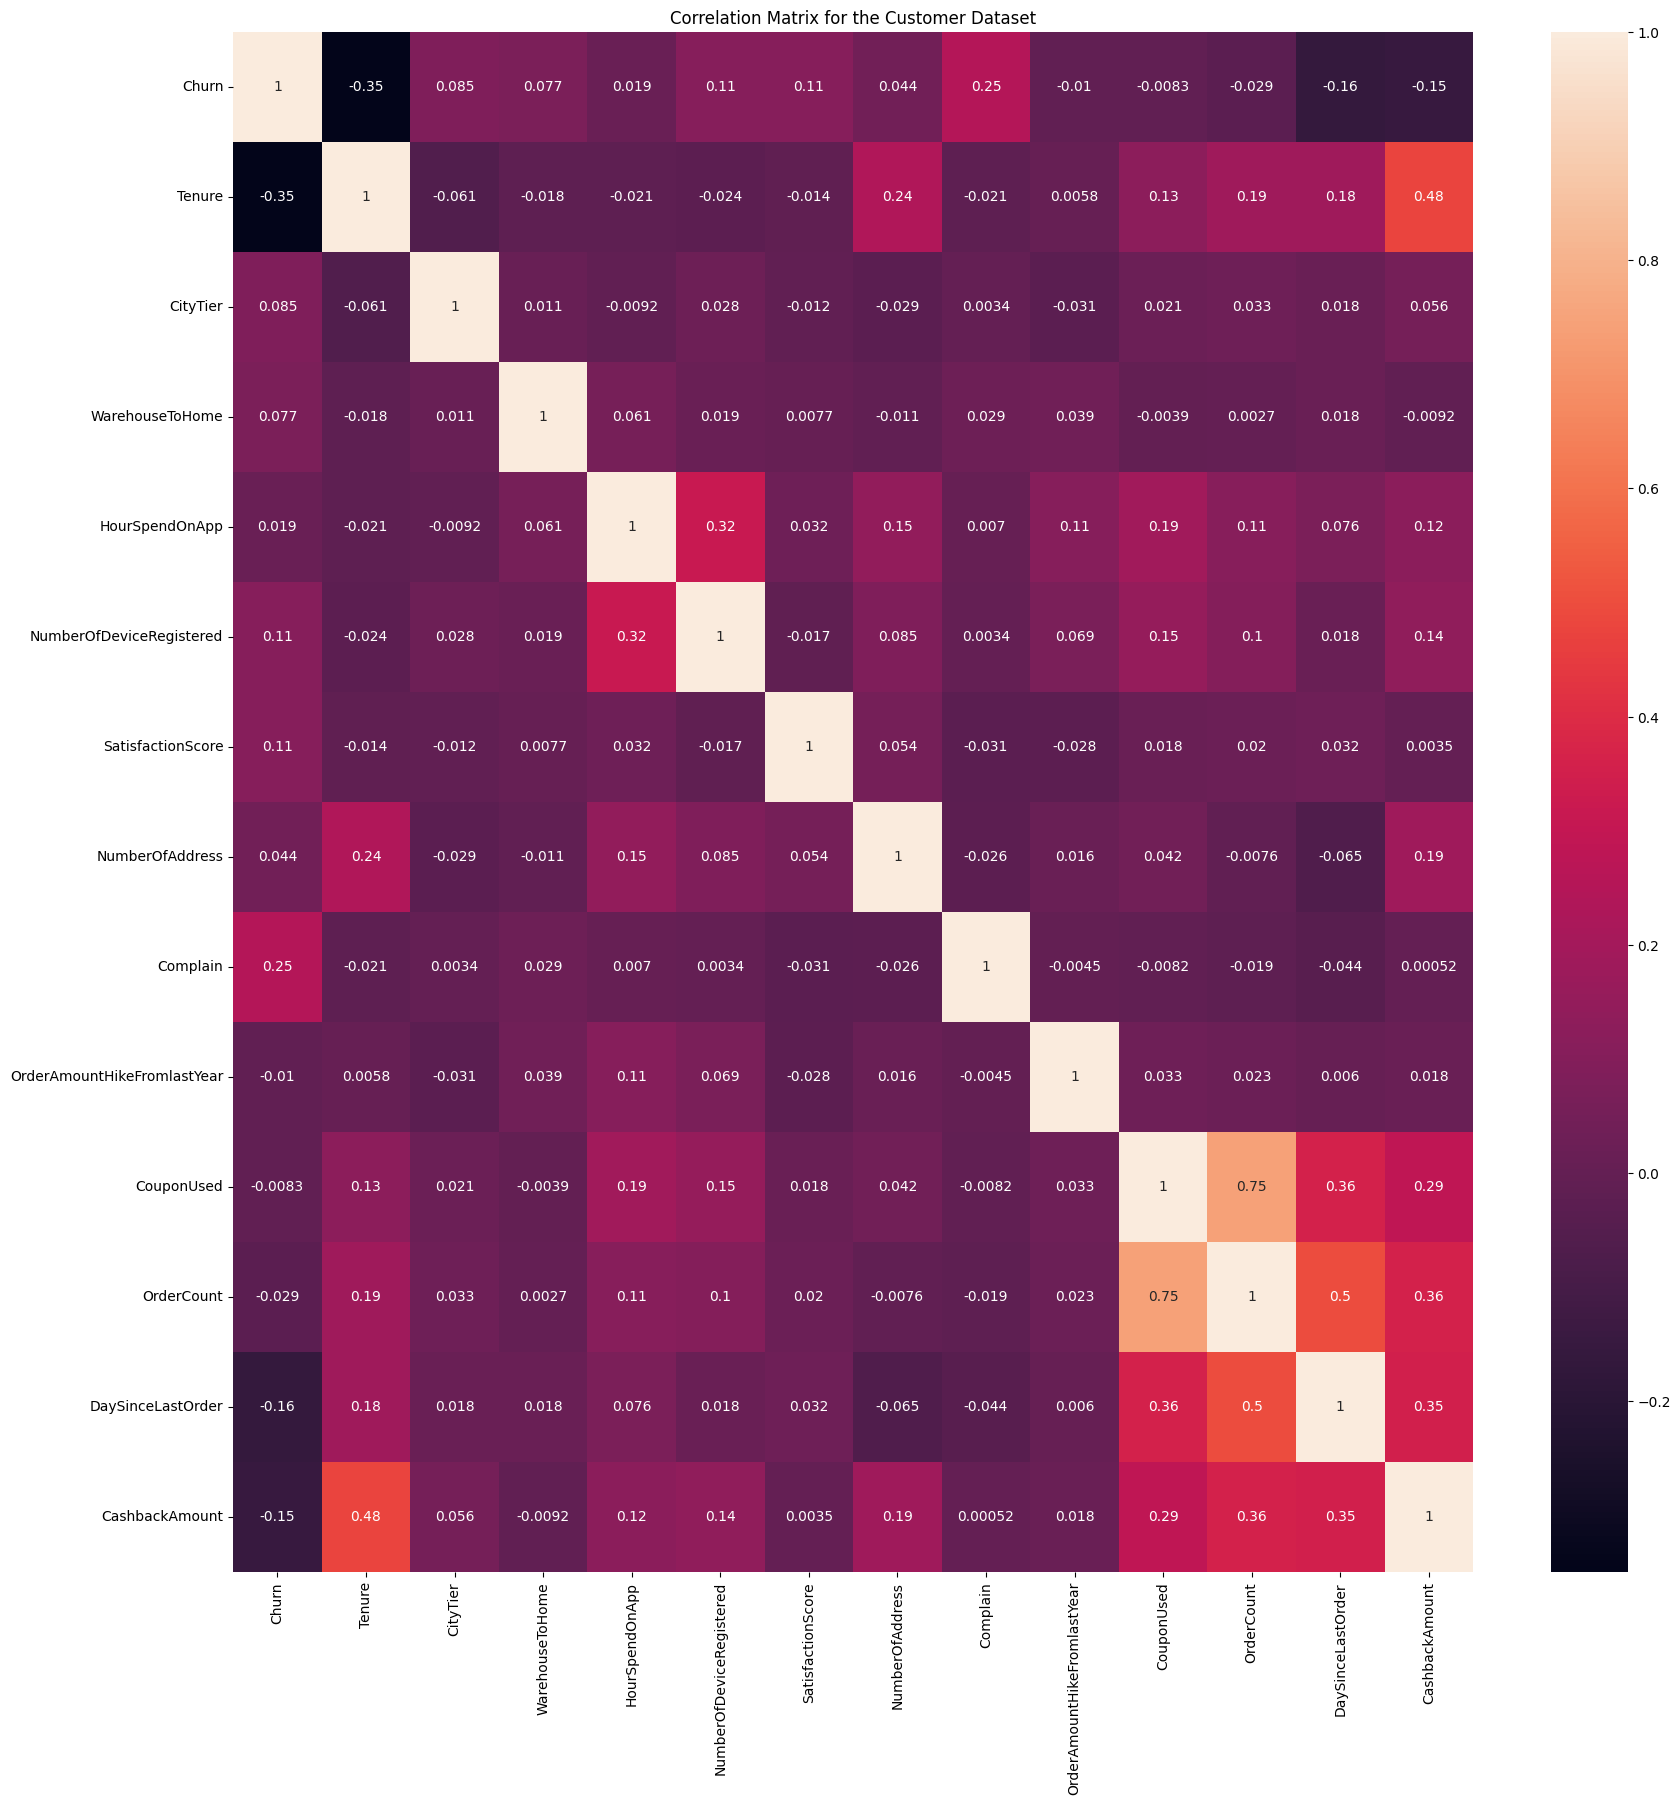

In [194]:
plt.figure(figsize=(20,20))
sns.heatmap(data.drop('CustomerID',axis=1).corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

<ipython-input-195-28987cea642a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

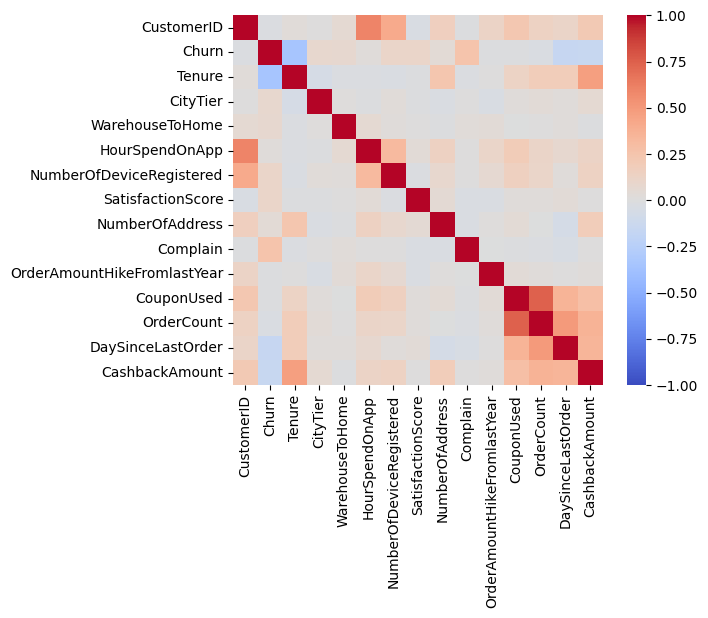

In [195]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Как видно из этой матрицы, наблюдается корреляция между признаками OrderCount и CouponUsed, что логично, ведь чем больше у клиента купонов, тем больше заказов он сделает. Кроме того, есть также корреляция между признаками OrderCount и DaysSinceLastOrder.

Визуализируем соотношение классов:

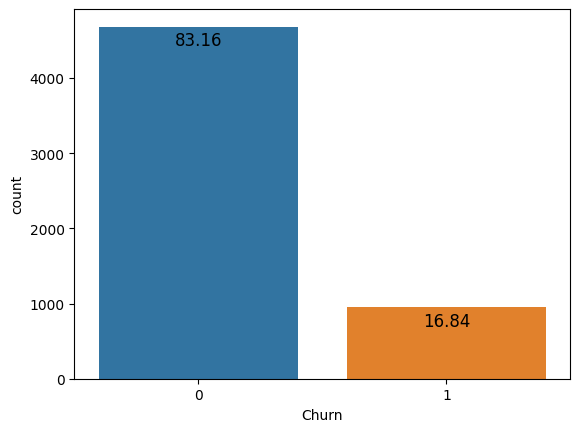

In [196]:
ax = sns.countplot(x='Churn', data=data)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

Удалим признак CustomerID, для нас никакой практической ценности он не имеет.

In [197]:
data.drop('CustomerID', axis = 1, inplace = True)
data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Сгруппируем числовые и категориальные признаки:

In [198]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [199]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Поскольку Mobile Phone и Phone - это одно и то же (смартфоны), то имеет смысл провести слияние этих значений:

In [200]:
data.loc[data['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
data['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

В PreferedOrderCat ситуация с Mobile и Mobile Phone аналогична:

In [201]:
data['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [202]:
data.loc[data['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
data['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Разделим категориальные признаки на бинарные и небинарные:

In [203]:
binary_columns    = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['PreferredLoginDevice', 'Gender'] ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']


Обработаем пропущенные значения:

In [204]:
data.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [205]:
print(f'The number of missing values: {data.isnull().sum().sum()}')
print(f'The number of rows with missing values: {data[data.isnull().any(axis=1)].shape[0]}')


The number of missing values: 1856
The number of rows with missing values: 1856


Итак, мы видим, что в нашем датасете есть 1856 пропущенных значений и ровно столько же строк с пропущенными значениями, причем эти значения пропущены только у числовых признаков. Другими словами, в каждой из этих 1856 строк у нас имеется ровно по одному пропущенному значению. Если мы просто удалим эти строки, у нас потеряется примерно треть всего датасета, поэтому такой вариант действий не предпочтителен.

Заменим пропущенные значения в числовых признаках средним арифметическим:

In [206]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'mean')
imputer.fit(data[numerical_columns])
data[numerical_columns] = imputer.transform(data[numerical_columns])

In [207]:
data.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Поскольку в нашем датасете у одних числовых признаков маленькие значения (например, CityTier и Tenure), а у других большие (например, CashbackAmount и OrderAmountHikeFromlastYear), то имеет смысл провести нормализацию данных, приведя их к промежутку [0, 1] с помощью MinMaxScaler, чтобы уменьшить негативное влияние на работу модели машинного обучения.

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[numerical_columns])
data[numerical_columns] = scaler.transform(data[numerical_columns])

data[numerical_columns]

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,0.065574,1.0,0.008197,0.600000,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.000000,0.108696,0.492107
1,1.0,0.167048,0.0,0.024590,0.600000,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.000000,0.000000,0.372011
2,1.0,0.167048,0.0,0.204918,0.400000,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.000000,0.065217,0.370104
3,1.0,0.000000,1.0,0.081967,0.400000,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.000000,0.065217,0.412536
4,1.0,0.000000,0.0,0.057377,0.586307,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.000000,0.065217,0.398782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.0,0.204918,0.600000,0.2,0.00,0.238095,0.0,0.466667,0.0625,0.066667,0.086957,0.463737
5626,0.0,0.213115,0.0,0.065574,0.600000,0.8,1.00,0.238095,0.0,0.333333,0.0625,0.066667,0.098772,0.692052
5627,0.0,0.016393,0.0,0.049180,0.600000,0.2,0.75,0.095238,1.0,0.666667,0.0625,0.066667,0.086957,0.573618
5628,0.0,0.377049,1.0,0.032787,0.800000,0.8,0.75,0.142857,0.0,0.266667,0.1250,0.066667,0.195652,0.550478


Так как алгоритм машинного обучения принимает на вход только численные признаки, лучше всего будет закодировать имеющиеся у нас категориальные признаки при помощи техники One-Hot Encoding.

In [209]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(data[categorical_columns])
encoded_columns = list(encoder.get_feature_names_out(categorical_columns))
print(encoded_columns)
data[encoded_columns] = encoder.transform(data[categorical_columns])

['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [210]:
data[encoded_columns]

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Соединим все данные:

In [211]:
X = data[numerical_columns + encoded_columns]
X.drop('Churn', axis =1, inplace = True)
X

<ipython-input-211-ee59b4e6d515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Churn', axis =1, inplace = True)


,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.065574,1.0,0.008197,0.600000,0.4,0.25,0.380952,1.0,0.000000,0.0625,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.167048,0.0,0.024590,0.600000,0.6,0.50,0.285714,1.0,0.266667,0.0000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.167048,0.0,0.204918,0.400000,0.6,0.50,0.238095,1.0,0.200000,0.0000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,1.0,0.081967,0.400000,0.6,1.00,0.333333,0.0,0.800000,0.0000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.057377,0.586307,0.4,1.00,0.095238,0.0,0.000000,0.0625,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.163934,0.0,0.204918,0.600000,0.2,0.00,0.238095,0.0,0.466667,0.0625,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.213115,0.0,0.065574,0.600000,0.8,1.00,0.238095,0.0,0.333333,0.0625,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.016393,0.0,0.049180,0.600000,0.2,0.75,0.095238,1.0,0.666667,0.0625,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,0.377049,1.0,0.032787,0.800000,0.8,0.75,0.142857,0.0,0.266667,0.1250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Целевая переменная:

In [212]:
y = data['Churn']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5625    0.0
5626    0.0
5627    0.0
5628    0.0
5629    0.0
Name: Churn, Length: 5630, dtype: float64

Теперь разобъём датасет на обучающую и тестовую выборки в соотношении 1/5 соответственно...

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

... А затем обучим нашу модель при помощи метода k ближайших соседей:

In [214]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.11989342806394317
0.13854351687388988


In [215]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8801065719360568, 0.8614564831261101)

In [216]:
confusion_matrix(pred_test, y_test)

array([[922, 137],
       [ 19,  48]])

Можно попробовать уменьшить ошибку, попробовав другие значения параметра N:

N = 5

In [217]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.06327708703374778
0.10124333925399645


In [218]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9367229129662522, 0.8987566607460036)

In [219]:
confusion_matrix(pred_test, y_test)

array([[913,  86],
       [ 28,  99]])

N = 3

In [220]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.022868561278863234
0.08614564831261101


In [221]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9771314387211367, 0.9138543516873889)

In [222]:
confusion_matrix(pred_test, y_test)

array([[906,  62],
       [ 35, 123]])

N = 1

In [223]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.0
0.02575488454706927


In [224]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(1.0, 0.9742451154529307)

In [225]:
confusion_matrix(pred_test, y_test)

array([[929,  17],
       [ 12, 168]])

Как видим, наибольшая точность достигается при значении параметра N = 1.

# Другие классификаторы

Random Forest Classifier

In [226]:
from sklearn.ensemble import RandomForestClassifier
random_forest =  RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

pred_train = random_forest.predict(X_train)
pred_test = random_forest.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.0
0.02664298401420959


In [227]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(1.0, 0.9733570159857904)

In [228]:
confusion_matrix(pred_test, y_test)

array([[940,  29],
       [  1, 156]])

SVC

In [229]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.14498223801065718
0.14742451154529307


In [230]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8550177619893428, 0.8525754884547069)

In [231]:
confusion_matrix(pred_test, y_test)

array([[939, 164],
       [  2,  21]])

Extremely Randomized Trees

In [232]:
from sklearn.ensemble import ExtraTreesClassifier
ert = ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

pred_train = ert.predict(X_train)
pred_test = ert.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.0
0.019538188277087035


In [233]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(1.0, 0.9804618117229129)

In [234]:
confusion_matrix(pred_test, y_test)

array([[941,  22],
       [  0, 163]])

GBT

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

pred_train = gbt.predict(X_train)
pred_test = gbt.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.0013321492007104796
0.027531083481349913


In [236]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9986678507992895, 0.9724689165186501)

In [237]:
confusion_matrix(pred_test, y_test)

array([[934,  24],
       [  7, 161]])

Как видно из результатов, эффективнее всего оказались классификаторы Extremely Randomized Trees и kNN при N = 1. В обоих случаях ошибка на тестовой выборке составила не более 0,026. Кроме того, во всех случаях ошибка на тестовой выборке больше, чем на обучающей, что говорит о переобучении модели.

Классификатор Random Forest рассматривался чуть выше, поэтому дальше мы рассмотрим другие классификаторы.

Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
log_reg =  LogisticRegression(solver="liblinear")
log_reg.fit(X_train, y_train)

pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.11456483126110124
0.09147424511545293


In [239]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8854351687388987, 0.9085257548845471)

In [240]:
confusion_matrix(pred_train, y_train)

array([[3645,  420],
       [  96,  343]])

In [241]:
confusion_matrix(pred_test, y_test)

array([[928,  90],
       [ 13,  95]])

Полносвязная нейронная сеть

In [242]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (58,),
                    solver = 'adam',
                    activation = 'logistic',
                    random_state = 7, max_iter = 200)
mlp.fit(X_train, y_train)

pred_train = mlp.predict(X_train)
pred_test = mlp.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.11412078152753108
0.0905861456483126


In [243]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8858792184724689, 0.9094138543516874)

In [244]:
confusion_matrix(pred_train, y_train)

array([[3569,  342],
       [ 172,  421]])

In [245]:
confusion_matrix(pred_test, y_test)

array([[912,  73],
       [ 29, 112]])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


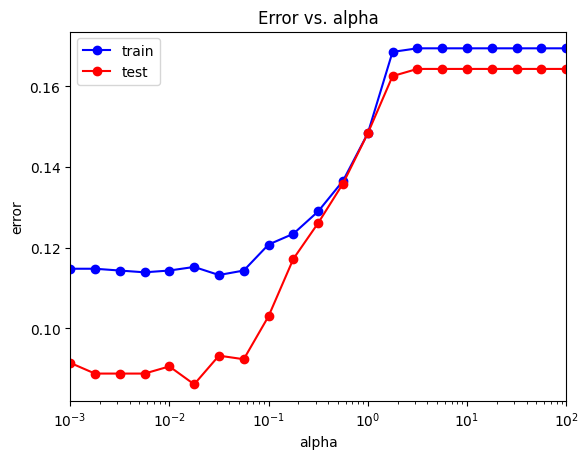

In [246]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp = MLPClassifier(alpha = alpha, hidden_layer_sizes = (58,),
                              solver = 'adam', activation = 'logistic', max_iter=200, random_state = 7)
    mlp.fit(X_train, y_train)

    pred_train = mlp.predict(X_train)
    pred_test = mlp.predict(X_test)

    train_err.append(np.mean(y_train != pred_train))
    test_err.append(np.mean(y_test != pred_test))
    train_acc.append(accuracy_score(y_train, pred_train))
    test_acc.append(accuracy_score(y_test, pred_test))
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

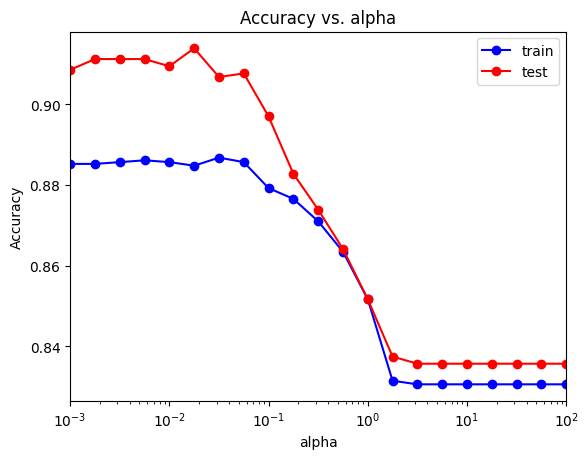

In [247]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [248]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Minimum train error: ")
print(min_train_err)
print("Minimum test error: ")
print(min_test_err)

Minimum train error: 
0.11323268206039076
Minimum test error: 
0.08614564831261101


In [249]:
alpha_opt = alpha_arr[test_err == min_test_err]
print("Optimal alpha: ")
print(alpha_opt)

Optimal alpha: 
[0.01778279]


In [250]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (58,),
                    solver = 'adam',
                    activation = 'logistic',
                    random_state = 7, max_iter = 200)
mlp.fit(X_train, y_train)

pred_train = mlp.predict(X_train)
pred_test = mlp.predict(X_test)

err_test  = np.mean(y_test != pred_test)
err_train  = np.mean(y_train != pred_train)
print(err_train)
print(err_test)

0.11523090586145648
0.08614564831261101


In [251]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8847690941385435, 0.9138543516873889)

In [252]:
confusion_matrix(pred_train, y_train)

array([[3578,  356],
       [ 163,  407]])

In [253]:
confusion_matrix(pred_test, y_test)

array([[917,  73],
       [ 24, 112]])

# Итоги

По итогу проведенных испытаний видим, что быстрее всех учится логистическая регрессия. При этом самую большую точность имеет Random Forest. Кроме того, неглубокая нейронная сеть (на одном слое) имеет такую же точность, как алгоритм логистической регрессии.
Стоит также отметить, что оптимизация параметра alpha для нейронной сети не дала большого прироста точности предсказания.
Как уже упоминалось ранее, ошибка на тестовой выборке чуть больше, чем на обучающей, у kNN, SVC, GBT и Random Forest, что говорило о некотором переобучении этих моделей, в то время как у логистической регрессии и нейронной сети ошибка чуть больше на обучающей выборке, что свидетельствует о том, что эти модели работают в целом нормально.

Подводя итог, можно сказать, что исходные данные были обработаны и задача классификации решена успешно.